<a href="https://colab.research.google.com/github/xadicavadzade/filmrecommendation/blob/main/filmrecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**

In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rajansavaliya22/popular-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rajansavaliya22/popular-movies-dataset
License(s): apache-2.0
  0% 0.00/58.2M [00:00<?, ?B/s]
100% 58.2M/58.2M [00:00<00:00, 1.09GB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("popular-movies-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("movie_data")

In [ ]:
import pandas as pd
import numpy as np


# **Basic Info**

In [ ]:
movie = pd.read_csv('/content/movie_data/popular_movies (2).csv')
movie.head()

,title,budget,genres,original_language,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,production_companies,production_countries
0,War of the Worlds,5,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,Will Radford is a top analyst for Homeland Sec...,1604.1460,/yvirUYrva23IudARHn3mMGVxWqM.jpg,2025-07-29,0,91,"[{'english_name': 'English', 'iso_639_1': 'en'...",4.244,291,"[{'id': 33, 'logo_path': '/6exxhPonOo0M995SAch...","[{'iso_3166_1': 'US', 'name': 'United States o..."
1,Jurassic World Rebirth,180000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,Five years after the events of Jurassic World ...,1090.5346,/1RICxzeoNCAO5NpcRMIgg1XT6fm.jpg,2025-07-01,800368830,134,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.394,1460,"[{'id': 33, 'logo_path': '/6exxhPonOo0M995SAch...","[{'iso_3166_1': 'US', 'name': 'United States o..."
2,William Tell,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"The narrative unfolds in the 14th Century, whe...",489.6871,/8SdaetXSTPyQVDb5pTEPRLBSx15.jpg,2025-01-17,264637,133,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.306,90,"[{'id': 3130, 'logo_path': '/b2blyz6adfykkLdLQ...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_..."
3,The Pickup,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,A routine cash pickup takes a wild turn when m...,470.8600,/vFWvWhfAvij8UIngg2Vf6JV95Cr.jpg,2025-07-27,0,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.556,207,"[{'id': 77061, 'logo_path': None, 'name': 'The...","[{'iso_3166_1': 'US', 'name': 'United States o..."
4,Creation of the Gods II: Demon Force,120000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",zh,Taishi Wen Zhong led the army of Shang Dynasty...,376.1259,/dfUCs5HNtGu4fofh83uiE2Qcy3v.jpg,2025-01-29,172619925,145,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",6.333,72,"[{'id': 248570, 'logo_path': None, 'name': '上海...","[{'iso_3166_1': 'CN', 'name': 'China'}]"


In [ ]:
credits = pd.read_csv('/content/movie_data/credits (2).csv')
credits.head()

,tmdb_id,title,cast,crew
0,755898,War of the Worlds,"[{'adult': False, 'gender': 2, 'id': 9778, 'kn...","[{'adult': False, 'gender': 2, 'id': 11624, 'k..."
1,1234821,Jurassic World Rebirth,"[{'adult': False, 'gender': 1, 'id': 1245, 'kn...","[{'adult': False, 'gender': 2, 'id': 664, 'kno..."
2,1195631,William Tell,"[{'adult': False, 'gender': 2, 'id': 150802, '...","[{'adult': False, 'gender': 2, 'id': 6361, 'kn..."
3,1106289,The Pickup,"[{'adult': False, 'gender': 2, 'id': 776, 'kno...","[{'adult': False, 'gender': 2, 'id': 2043, 'kn..."
4,1155281,Creation of the Gods II: Demon Force,"[{'adult': False, 'gender': 2, 'id': 128026, '...","[{'adult': False, 'gender': 2, 'id': 232685, '..."


In [ ]:
movies = movie.merge(credits , on ='title' , how ='left')
movies.head()

,title,budget,genres,original_language,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,production_companies,production_countries,tmdb_id,cast,crew
0,War of the Worlds,5,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,Will Radford is a top analyst for Homeland Sec...,1604.1460,/yvirUYrva23IudARHn3mMGVxWqM.jpg,2025-07-29,0,91,"[{'english_name': 'English', 'iso_639_1': 'en'...",4.244,291,"[{'id': 33, 'logo_path': '/6exxhPonOo0M995SAch...","[{'iso_3166_1': 'US', 'name': 'United States o...",755898.0,"[{'adult': False, 'gender': 2, 'id': 9778, 'kn...","[{'adult': False, 'gender': 2, 'id': 11624, 'k..."
1,War of the Worlds,5,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,Will Radford is a top analyst for Homeland Sec...,1604.1460,/yvirUYrva23IudARHn3mMGVxWqM.jpg,2025-07-29,0,91,"[{'english_name': 'English', 'iso_639_1': 'en'...",4.244,291,"[{'id': 33, 'logo_path': '/6exxhPonOo0M995SAch...","[{'iso_3166_1': 'US', 'name': 'United States o...",74.0,"[{'adult': False, 'gender': 2, 'id': 500, 'kno...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
2,Jurassic World Rebirth,180000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,Five years after the events of Jurassic World ...,1090.5346,/1RICxzeoNCAO5NpcRMIgg1XT6fm.jpg,2025-07-01,800368830,134,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.394,1460,"[{'id': 33, 'logo_path': '/6exxhPonOo0M995SAch...","[{'iso_3166_1': 'US', 'name': 'United States o...",1234821.0,"[{'adult': False, 'gender': 1, 'id': 1245, 'kn...","[{'adult': False, 'gender': 2, 'id': 664, 'kno..."
3,William Tell,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"The narrative unfolds in the 14th Century, whe...",489.6871,/8SdaetXSTPyQVDb5pTEPRLBSx15.jpg,2025-01-17,264637,133,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.306,90,"[{'id': 3130, 'logo_path': '/b2blyz6adfykkLdLQ...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1195631.0,"[{'adult': False, 'gender': 2, 'id': 150802, '...","[{'adult': False, 'gender': 2, 'id': 6361, 'kn..."
4,The Pickup,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,A routine cash pickup takes a wild turn when m...,470.8600,/vFWvWhfAvij8UIngg2Vf6JV95Cr.jpg,2025-07-27,0,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.556,207,"[{'id': 77061, 'logo_path': None, 'name': 'The...","[{'iso_3166_1': 'US', 'name': 'United States o...",1106289.0,"[{'adult': False, 'gender': 2, 'id': 776, 'kno...","[{'adult': False, 'gender': 2, 'id': 2043, 'kn..."


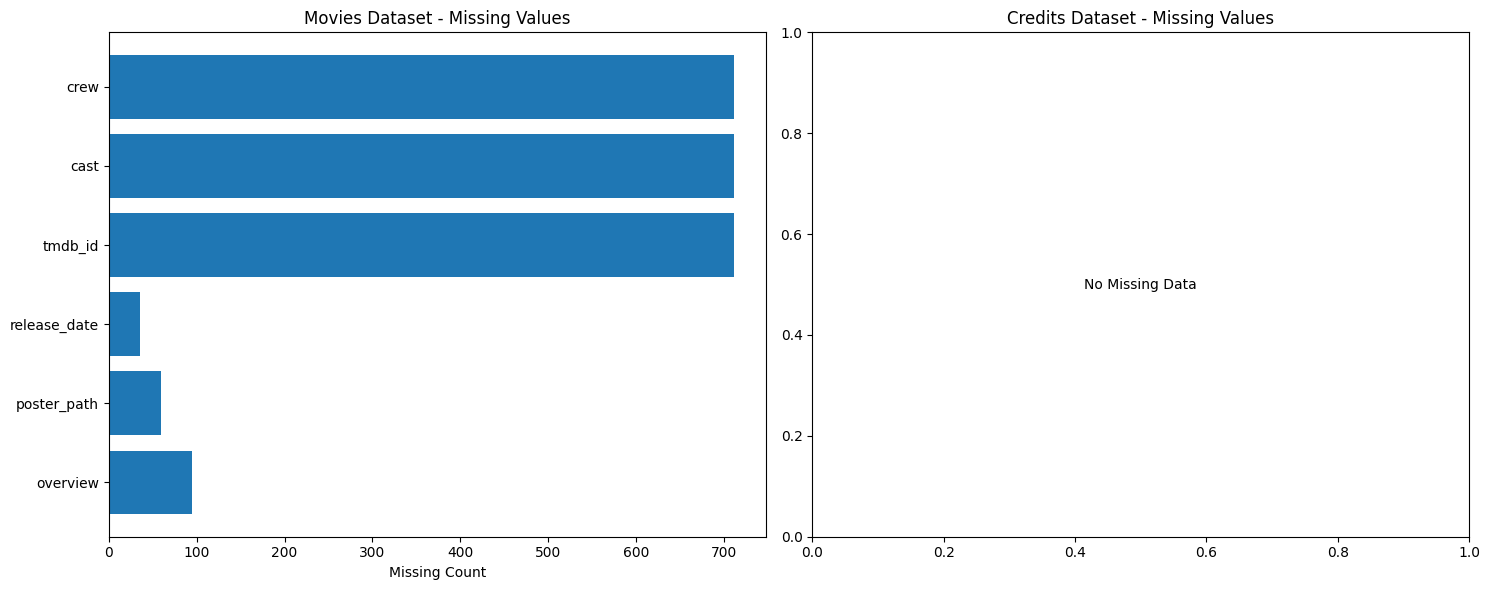

In [ ]:
import matplotlib.pyplot as plt

def visualize_missing_data():

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Movies missing data
        movies_missing = movies.isnull().sum()
        movies_missing = movies_missing[movies_missing > 0]

        if len(movies_missing) > 0:
            axes[0].barh(movies_missing.index, movies_missing.values)
            axes[0].set_title('Movies Dataset - Missing Values')
            axes[0].set_xlabel('Missing Count')
        else:
            axes[0].text(0.5, 0.5, 'No Missing Data', ha='center', va='center')
            axes[0].set_title('Movies Dataset - Missing Values')

        # Credits missing data
        credits_missing = credits.isnull().sum()
        credits_missing = credits_missing[credits_missing > 0]

        if len(credits_missing) > 0:
            axes[1].barh(credits_missing.index, credits_missing.values)
            axes[1].set_title('Credits Dataset - Missing Values')
            axes[1].set_xlabel('Missing Count')
        else:
            axes[1].text(0.5, 0.5, 'No Missing Data', ha='center', va='center')
            axes[1].set_title('Credits Dataset - Missing Values')

        plt.tight_layout()
        plt.show()

visualize_missing_data()


📈 Əsas Statistika:
             budget       revenue       runtime  vote_average    vote_count  \
count  1.354600e+04  1.354600e+04  13546.000000  13546.000000  13546.000000   
mean   2.451585e+07  7.249142e+07    102.169423      6.370920   2030.247158   
std    4.485333e+07  1.612974e+08     28.573797      1.425509   3360.328110   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     91.000000      5.960000    154.250000   
50%    5.000000e+06  9.086624e+06    102.000000      6.586000    826.000000   
75%    3.000000e+07  7.260000e+07    116.000000      7.185000   2332.000000   
max    6.000000e+08  2.923706e+09    558.000000     10.000000  37778.000000   

         popularity  
count  13546.000000  
mean       6.006458  
std       25.572427  
min        0.770500  
25%        2.515400  
50%        3.495700  
75%        5.531600  
max     1604.146000  


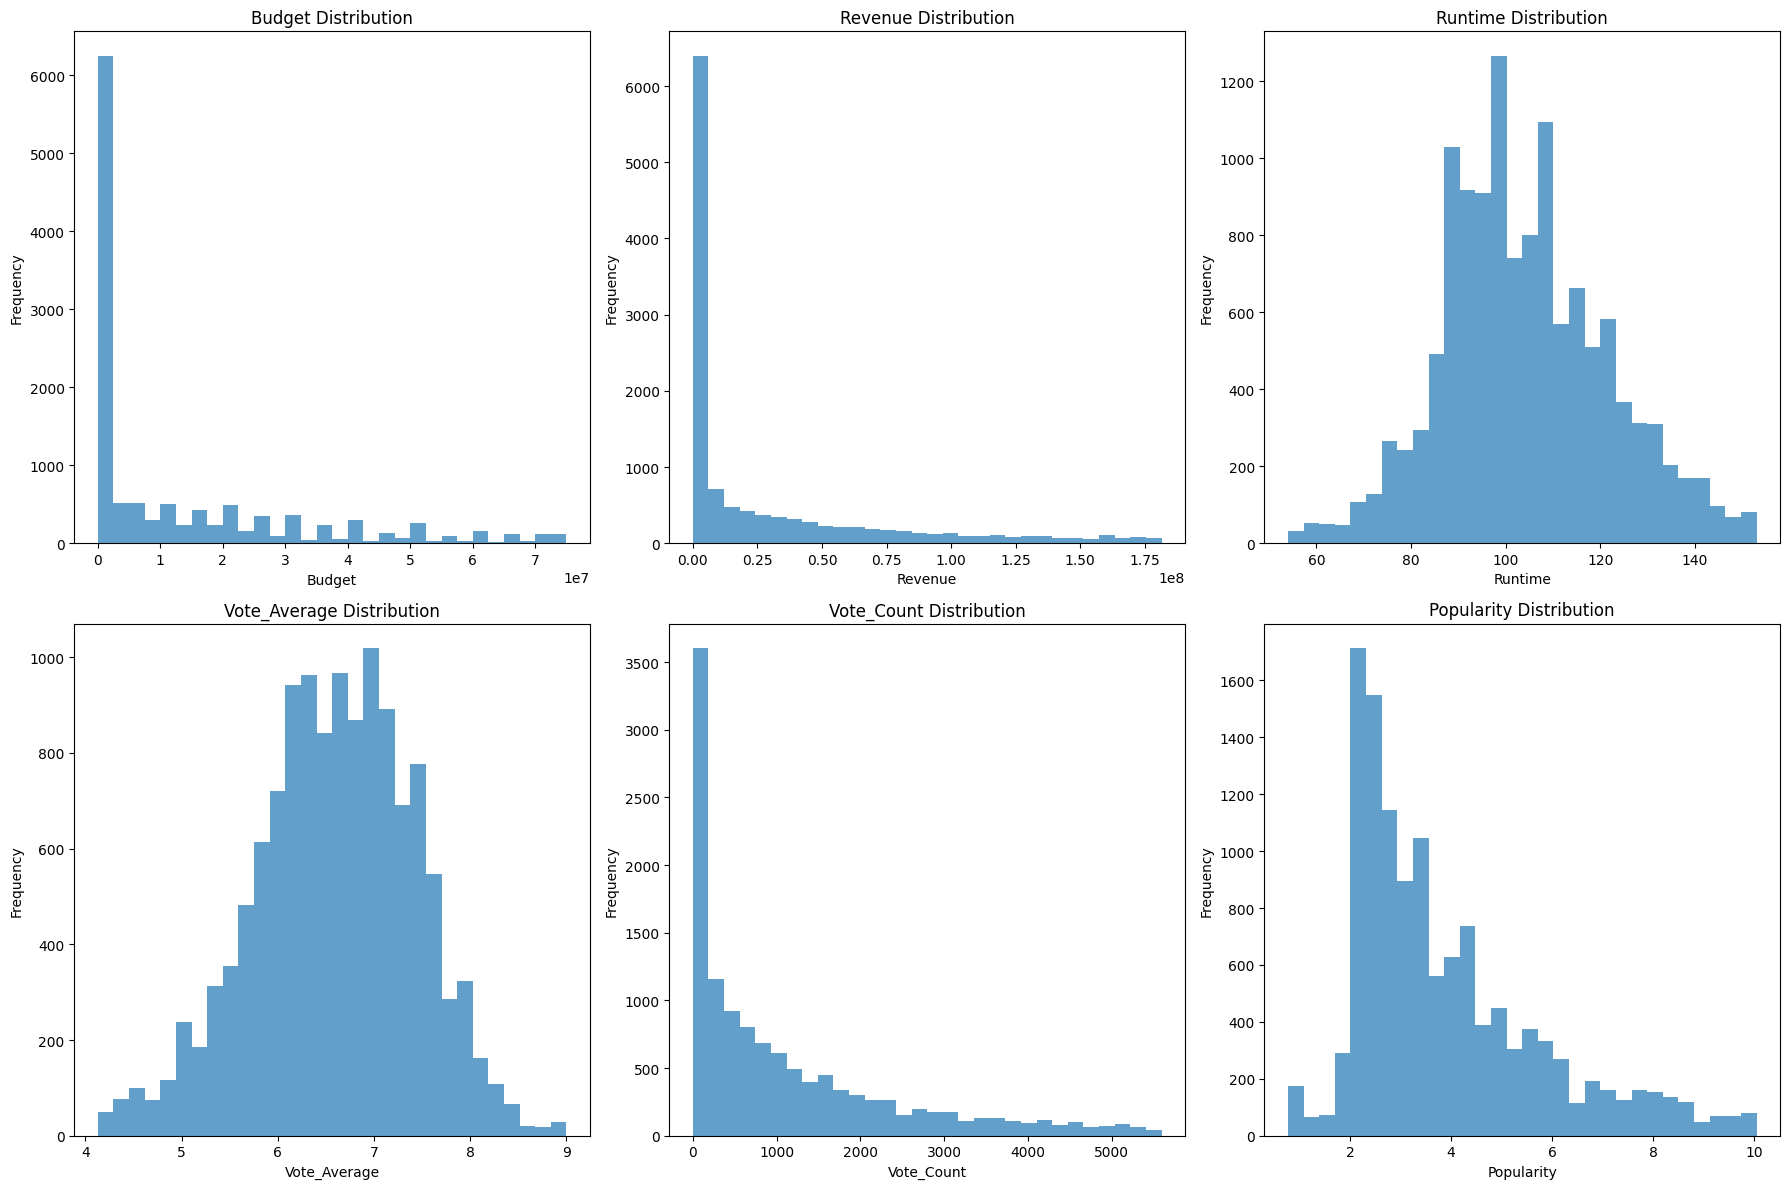

In [ ]:
def explore_numeric_features():

        numeric_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']

        # Basic statistics
        print("\n📈 Əsas Statistika:")
        print(movies[numeric_cols].describe())

        # Visualizations
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for i, col in enumerate(numeric_cols):
            if col in movies.columns:
                # Remove outliers for better visualization
                data = movies[col].dropna()
                q1 = data.quantile(0.25)
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

                axes[i].hist(filtered_data, bins=30, alpha=0.7)
                axes[i].set_title(f'{col.title()} Distribution')
                axes[i].set_xlabel(col.title())
                axes[i].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

explore_numeric_features()

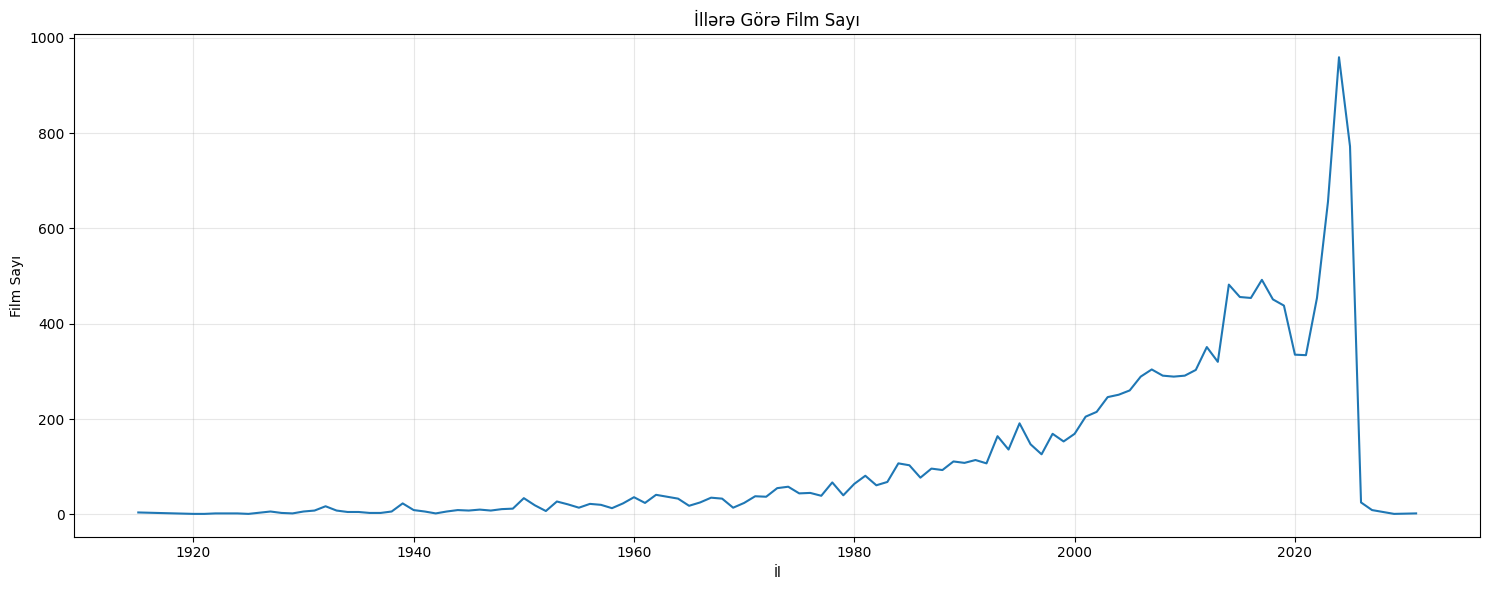

Ən köhnə film: 1915.0
Ən yeni film: 2031.0
Ortalama il: 2007


In [ ]:
def analyze_release_dates():


        # Convert to datetime
        movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
        movies['release_year'] = movies['release_date'].dt.year

        # Year distribution
        year_counts = movies['release_year'].value_counts().sort_index()

        plt.figure(figsize=(15, 6))
        year_counts.plot(kind='line')
        plt.title('İllərə Görə Film Sayı')
        plt.xlabel('İl')
        plt.ylabel('Film Sayı')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


        print(f"Ən köhnə film: {year_counts.index.min()}")
        print(f"Ən yeni film: {year_counts.index.max()}")
        print(f"Ortalama il: {movies['release_year'].mean():.0f}")
analyze_release_dates()



🎭 Janrlar araşdırılır...

🏆 Ən Populyar Janrlar:
 1. Drama: 5560
 2. Action: 3890
 3. Comedy: 3851
 4. Thriller: 3685
 5. Adventure: 2537
 6. Romance: 2242
 7. Horror: 2013
 8. Crime: 1954
 9. Fantasy: 1818
10. Science Fiction: 1633
11. Family: 1592
12. Animation: 1448
13. Mystery: 1110
14. History: 588
15. War: 455


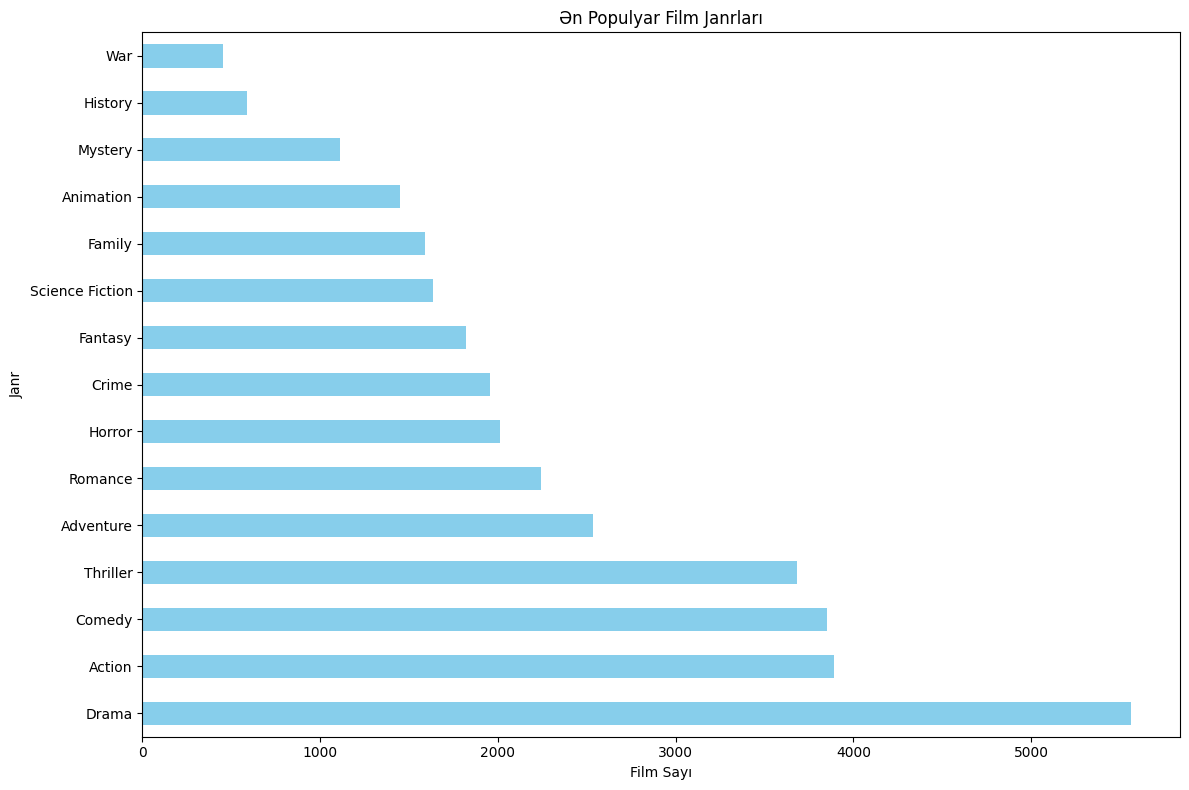

,count
Drama,5560
Action,3890
Comedy,3851
Thriller,3685
Adventure,2537
Romance,2242
Horror,2013
Crime,1954
Fantasy,1818
Science Fiction,1633


In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

def analyze_genres(movies):
    """🎭 Janrlar araşdır və vizuallaşdır"""

    print("\n🎭 Janrlar araşdırılır...")

    # Convert 'genres' sütunundakı stringləri janr adlarına çevir
    def convert(obj):
        gen_name = []
        try:
            for i in ast.literal_eval(obj):
                gen_name.append(i['name'])
        except (ValueError, SyntaxError, TypeError):
            pass
        return gen_name

    movies['genres'] = movies['genres'].apply(convert)

    # Bütün janrları bir listə yığ
    genres_list = []
    for genres_entry in movies['genres']:
        if isinstance(genres_entry, list):
            for genre in genres_entry:
                if isinstance(genre, str):
                    genres_list.append(genre)

    # Janrların sayını hesabla
    genre_counts = pd.Series(genres_list).value_counts().head(15)

    print(f"\n🏆 Ən Populyar Janrlar:")
    for i, (genre, count) in enumerate(genre_counts.items(), 1):
        print(f"{i:2d}. {genre}: {count}")

    # Vizualizasiya
    plt.figure(figsize=(12, 8))
    if not genre_counts.empty:
        genre_counts.plot(kind='barh', color="skyblue")
        plt.title('Ən Populyar Film Janrları')
        plt.xlabel('Film Sayı')
        plt.ylabel('Janr')
        plt.tight_layout()
        plt.show()
    else:
        print("No genres found to visualize.")

    return genre_counts


# Funksiyanı çağırmaq üçün:
analyze_genres(movies)


 7471 filmə aid budget/revenue məlumatı:
Ortalama budget: $42,334,748
Ortalama revenue: $128,875,204
Ortalama profit: $86,540,456
Ortalama ROI: 1290.9%


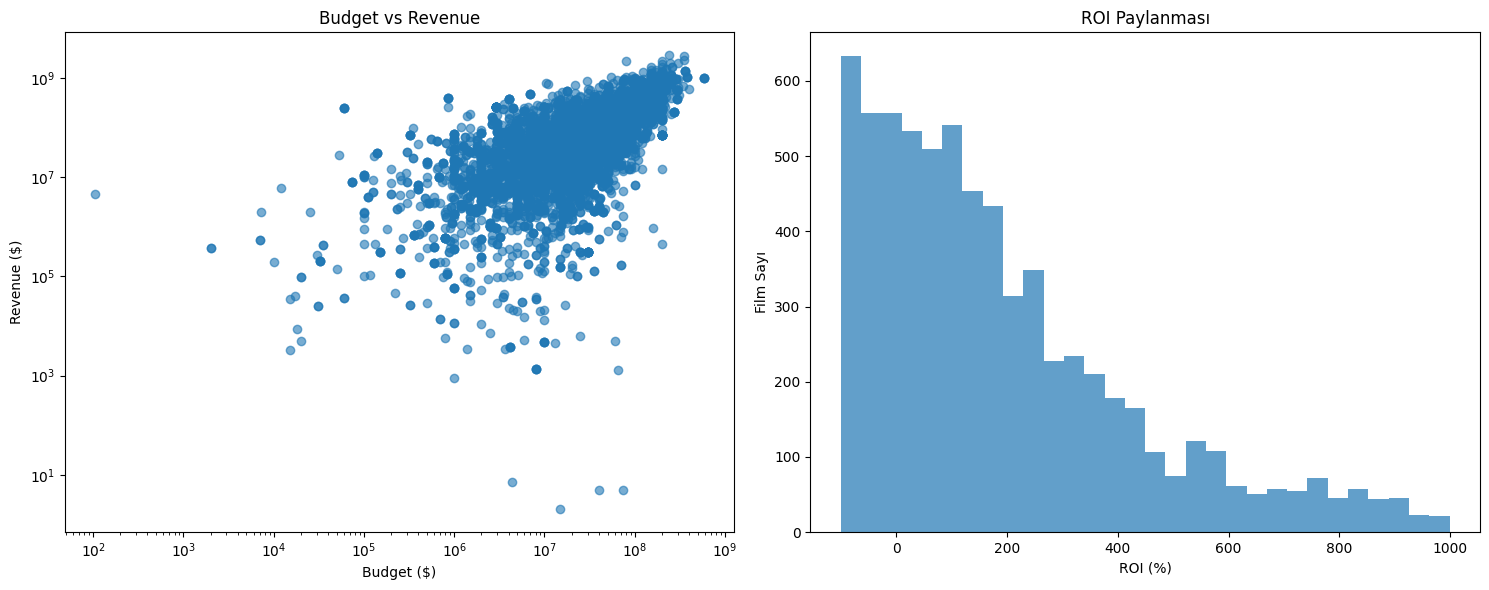


 Ən gəlirli filmlər:
• Avatar: $2,686,706,026 profit
• Avengers: Endgame: $2,443,439,100 profit
• Ne Zha 2: $2,136,990,000 profit
• Titanic: $2,064,162,353 profit
• Avatar: The Way of Water: $1,970,250,281 profit


In [ ]:
def revenue_budget_analysis():

        # Filter valid data
        movies = movies[
            (movies['budget'] > 0) &
            (movies['revenue'] > 0)
        ].copy()

        if len(movies) == 0:
            print("Budget və revenue məlumatı tapılmadı")
            return

        movies['profit'] = movies['revenue'] - movies['budget']
        movies['roi'] = (movies['revenue'] / movies['budget'] - 1) * 100

        print(f" {len(movies)} filmə aid budget/revenue məlumatı:")
        print(f"Ortalama budget: ${movies['budget'].mean():,.0f}")
        print(f"Ortalama revenue: ${movies['revenue'].mean():,.0f}")
        print(f"Ortalama profit: ${movies['profit'].mean():,.0f}")
        print(f"Ortalama ROI: {movies['roi'].mean():.1f}%")

        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Budget vs Revenue scatter
        axes[0].scatter(movies['budget'], movies['revenue'], alpha=0.6)
        axes[0].set_xlabel('Budget ($)')
        axes[0].set_ylabel('Revenue ($)')
        axes[0].set_title('Budget vs Revenue')
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')

        # ROI distribution
        roi_filtered = movies['roi'][(movies['roi'] > -100) & (movies['roi'] < 1000)]
        axes[1].hist(roi_filtered, bins=30, alpha=0.7)
        axes[1].set_xlabel('ROI (%)')
        axes[1].set_ylabel('Film Sayı')
        axes[1].set_title('ROI Paylanması')

        plt.tight_layout()
        plt.show()

        # Top profitable movies
        top_profit = movies.nlargest(5, 'profit')[['title', 'budget', 'revenue', 'profit']]
        print("\n Ən gəlirli filmlər:")
        for _, row in top_profit.iterrows():
            print(f"• {row['title']}: ${row['profit']:,.0f} profit")
revenue_budget_analysis()

In [ ]:
import ast
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# Köməkçi funksiyalar
# -----------------------------
def safe_eval(text):
    if isinstance(text, str):
        try:
            return ast.literal_eval(text)
        except (ValueError, SyntaxError):
            return []
    elif isinstance(text, list):
        return text
    return []

def cast(text):
    names = []
    for i in safe_eval(text):
        if isinstance(i, dict) and "name" in i:
            names.append(i['name'])
        if len(names) >= 3:
            break
    return names

def fetch_director(text):
    directors = []
    for i in safe_eval(text):
        if isinstance(i, dict) and i.get('job') == 'Director':
            directors.append(i['name'])
    return directors

def company_name(text):
    companies = []
    for i in safe_eval(text):
        if isinstance(i, dict) and "name" in i:
            companies.append(i['name'])
    return companies

def collapse(obj):
    return [i.replace(" ", "") for i in obj if isinstance(i, str)]

# -----------------------------
# Preprocessing funksiyası
# -----------------------------
def preprocess_movies(movies):
    # Əsas datasetin kopyasını alaq
    movies = movies.copy()

    # Yalnız dolu tmdb_id saxla
    movies = movies.dropna(subset=['tmdb_id']).copy()
    movies.loc[:, 'tmdb_id'] = movies['tmdb_id'].astype(int)

    # Duplicate sil
    movies = movies[movies[['title', 'release_date']].duplicated() == False].copy()

    # Tarixi düzəlt
    movies.loc[:, 'release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

    # Poster boş olmayanları saxla
    movies = movies[movies['poster_path'].notna()].copy()

    # Lazımlı sütunlar
    movies = movies[['tmdb_id', 'title', 'overview', 'genres',
                     'cast', 'crew', 'poster_path', 'production_companies']].copy()

    # Extract
    movies.loc[:, 'cast'] = movies['cast'].apply(cast)
    movies.loc[:, 'crew'] = movies['crew'].apply(fetch_director)
    movies.loc[:, 'production_companies'] = movies['production_companies'].apply(company_name)

    # Overview sözlərə ayır
    movies.loc[:, 'overview'] = movies['overview'].astype(str).apply(lambda x: x.split())

    # Collapse
    for col in ['genres', 'cast', 'crew', 'production_companies']:
        movies.loc[:, col] = movies[col].apply(collapse)

    # Yeni tags sütunu
    movies.loc[:, 'tags'] = (movies['genres'] + movies['overview'] +
                             movies['cast'] + movies['crew'] +
                             movies['production_companies'])

    # Sadələşdirilmiş DF
    new_df = movies[['tmdb_id', 'title', 'tags', 'poster_path']].copy()
    new_df.loc[:, 'tags'] = new_df['tags'].apply(lambda x: " ".join(x))
    new_df.reset_index(drop=True, inplace=True)

    return new_df
preprocess_movies(movies)

,tmdb_id,title,tags,poster_path
0,755898.0,War of the Worlds,ScienceFiction Thriller Will Radford is a top ...,/yvirUYrva23IudARHn3mMGVxWqM.jpg
1,1234821.0,Jurassic World Rebirth,ScienceFiction Adventure Action Five years aft...,/1RICxzeoNCAO5NpcRMIgg1XT6fm.jpg
2,1195631.0,William Tell,Action Drama History The narrative unfolds in ...,/8SdaetXSTPyQVDb5pTEPRLBSx15.jpg
3,1106289.0,The Pickup,Action Comedy Crime A routine cash pickup take...,/vFWvWhfAvij8UIngg2Vf6JV95Cr.jpg
4,1155281.0,Creation of the Gods II: Demon Force,Action Fantasy War Taishi Wen Zhong led the ar...,/dfUCs5HNtGu4fofh83uiE2Qcy3v.jpg
...,...,...,...,...
6961,895744.0,Studio 666,Horror Comedy Music Legendary rock band Foo Fi...,/zD2XyaV6eGEEgEzVnjg0hQVR5yz.jpg
6962,113833.0,The Normal Heart,Drama The story of the onset of the HIV-AIDS c...,/rQwdv1bNdc0OSG8svAEfWACcAAU.jpg
6963,17263.0,A Murder of Crows,Thriller Action Crime In the wake of a career-...,/fi88I3TTCY6JVwhEqlJCU2YeDNi.jpg
6964,261817.0,Gabriel,Drama Convinced that reuniting with his old gi...,/fkipS6g260yMr7KYphGgVunkSjY.jpg


In [ ]:
# Seçilmiş feature-lar
num_features = ["budget", "popularity", "runtime", "vote_average", "vote_count"]
cat_features = ["original_language"]

X = movie[num_features + cat_features]
y = movie["ROI"]

# ===================== 4. Train-Test Bölmə =====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===================== 5. Preprocessing =====================
# Numerikləri scale et, kategorikləri one-hot encode et
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

# ===================== 6. Model Pipelines =====================
# Linear Regression pipeline
linreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# ===================== 7. Train Models =====================
linreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# ===================== 8. Evaluation =====================
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, R²: {r2:.2f}")
    return y_pred

linreg_pred = evaluate_model("Linear Regression", linreg_pipeline, X_test, y_test)
rf_pred = evaluate_model("Random Forest", rf_pipeline, X_test, y_test)

# ===================== 9. Visualization =====================
# ROI distribution
plt.figure(figsize=(6,4))
sns.histplot(movie["ROI"], bins=50, kde=True)
plt.title("ROI Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(movie[num_features + ["revenue", "ROI"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Actual vs Predicted (Random Forest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Random Forest: Actual vs Predicted ROI")
plt.show()

# Feature importance (Random Forest)
rf_model = rf_pipeline.named_steps["model"]
importances = rf_model.feature_importances_
feature_names = (num_features +
                 list(rf_pipeline.named_steps["preprocessor"]
                      .named_transformers_["cat"]
                      .get_feature_names_out(cat_features)))
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000, stop_words='english')

In [ ]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.16448792, 0.03919309, ..., 0.06900656, 0.        ,
        0.        ],
       [0.16448792, 1.        , 0.10830607, ..., 0.02383656, 0.        ,
        0.        ],
       [0.03919309, 0.10830607, 1.        , ..., 0.05679618, 0.05184758,
        0.        ],
       ...,
       [0.06900656, 0.02383656, 0.05679618, ..., 1.        , 0.        ,
        0.0451754 ],
       [0.        , 0.        , 0.05184758, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0451754 , 0.        ,
        1.        ]])

In [ ]:
def recommend(movie):
  index = new_df[new_df['title'] == movie].index[0]
  distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x: x[1])
  for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Pulp Fiction')

Naked Killer
Damaged
Homejack Reverse
El Infierno
A Walk Among the Tombstones
